analyze NCI cervical cnv results

In [66]:
# import csv
import matplotlib
# import seaborn
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.stats import ttest_ind
# import scipy.stats as stats
# import scipy.stats as ss
# from matplotlib import style
# import matplotlib.gridspec as gridspec
# import matplotlib.patches as patches
matplotlib.style.use('ggplot')
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6, 4)
from adjustText import adjust_text


# from sklearn.decomposition import RandomizedPCA, PCA, TruncatedSVD
# from sklearn.linear_model import LogisticRegression
# from sklearn.manifold import TSNE
# from sklearn.preprocessing import StandardScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 1. produce list of amplied and deleted regions with oncogenes

In [43]:
root = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/gatk_cnv/'

In [3]:
f1 = '/home/szong/projects/resource/oncogenes.and.tumor.suppressor.genes.txt'
df_tg = pd.read_csv(f1, header=None)
df_tg.head()

tgs = df_tg[0].tolist()

,0
0,ABI1
1,ABI2
2,ABL1
3,ABL2
4,ACSL3


In [35]:
def summarize_genes(inf, tgs, wkdir):
    df = pd.read_csv(inf, sep='\t', header=None)#.replace('', 'None')
    inf = inf.split('/')[-1]
#     print(df)
    df.loc['genes',:] = df.apply(lambda x:  ','.join([i.strip() for i in set(x[~x.isnull()][4:]) if ('[' not in i)]))
    df.loc['tg_genes',:] = df.apply(lambda x:  ','.join([m.strip() for m in set(x[~x.isnull()][4:]) if m in tgs]))


    df1 = df.loc[[0,1,2,3,'genes', 'tg_genes'],:].T
    df1['xxx'] = df1.genes.apply(lambda x: x.split(','))
#     '' in the list when there is a blank in the original files, must have a better way to deal with this
    df1['num_genes'] = df1['xxx'].apply(lambda x: len(x) if '' not in x else len(x)-1)
    df1 = df1.drop('xxx', axis=1)
    df1 = df1.drop(0)
    df1 = df1[:-1]
    df1.columns = ['cytoband', 'q_value', 'residual_q_value', 'wide_peak_boundary', 'genes_in_wide_peak','oncogenes','num_genes']
#     df1['cancer_genes'] = df1.apply(lambda x: '({0}){1}'.format(x[4], x[5]), axis=1)
    of = f'{wkdir}{inf}.summary'
    print('write summary to: ', of)
    df1.to_csv(of, index=False, sep='\t')
    return df1

In [76]:
# summarize gistic focal results for hiv pos

wkdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/gatk_118_HIV_pos/'
files = ['/home/szong/bin/GISTIC_2_0_22/gatk_118_HIV_neg/amp_genes.conf_99.txt', '/home/szong/bin/GISTIC_2_0_22/gatk_118_HIV_neg/del_genes.conf_99.txt']
for inf in files:
    df1 = summarize_genes(inf, tgs, wkdir)

write summary to:  /projects/trans_scratch/validations/workspace/szong/Cervical/cnv/gatk_118_HIV_pos/amp_genes.conf_99.txt.summary
write summary to:  /projects/trans_scratch/validations/workspace/szong/Cervical/cnv/gatk_118_HIV_pos/del_genes.conf_99.txt.summary


In [77]:
%%bash -s $wkdir
cd $1
cat del_genes.conf_99.txt.summary |awk -F ":" '{print $1"\t"$2}'|sed 's/chr//g'|sort -k4n> del_genes.conf_99.txt.summary.sorted
cat amp_genes.conf_99.txt.summary |awk -F ":" '{print $1"\t"$2}'|sed 's/chr//g'|sort -k4n> amp_genes.conf_99.txt.summary.sorted

In [78]:
# for amps
pos_amp_file = f'{wkdir}/amp_genes.conf_99.txt.summary.sorted'
print(pos_amp_file)
pos_amps = get_qvalue_cytoband(pos_amp_file)
pos_amps.head(2)

/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/gatk_118_HIV_pos//amp_genes.conf_99.txt.summary.sorted


,q_value,cytoband,gene
0,0.008915,1q21.3,NOTCH2
0,0.008915,1q21.3,CLK2


In [79]:
# for dels
pos_del_file = f'{wkdir}/del_genes.conf_99.txt.summary.sorted'
print(pos_del_file)
pos_dels = get_qvalue_cytoband(pos_del_file)
pos_dels.head(2)

/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/gatk_118_HIV_pos//del_genes.conf_99.txt.summary.sorted


,q_value,cytoband,gene
0,0.036117,1p13.2,NOTCH2
0,0.036117,1p13.2,LOC729987


In [80]:
# hiv neg
wkdir = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/gatk_118_HIV_neg/'
files = ['/home/szong/bin/GISTIC_2_0_22/gatk_118_HIV_pos/amp_genes.conf_99.txt', '/home/szong/bin/GISTIC_2_0_22/gatk_118_HIV_pos/del_genes.conf_99.txt']
for inf in files:
    df1 = summarize_genes(inf, tgs, wkdir)

write summary to:  /projects/trans_scratch/validations/workspace/szong/Cervical/cnv/gatk_118_HIV_neg/amp_genes.conf_99.txt.summary
write summary to:  /projects/trans_scratch/validations/workspace/szong/Cervical/cnv/gatk_118_HIV_neg/del_genes.conf_99.txt.summary


In [81]:
%%bash -s $wkdir
cd $1
cat del_genes.conf_99.txt.summary |awk -F ":" '{print $1"\t"$2}'|sed 's/chr//g'|sort -k4n> del_genes.conf_99.txt.summary.sorted
cat amp_genes.conf_99.txt.summary |awk -F ":" '{print $1"\t"$2}'|sed 's/chr//g'|sort -k4n> amp_genes.conf_99.txt.summary.sorted

In [82]:
neg_amp_file = f'{wkdir}/amp_genes.conf_99.txt.summary.sorted'
print(neg_amp_file)
neg_amps = get_qvalue_cytoband(neg_amp_file)
neg_amps.head(2)

/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/gatk_118_HIV_neg//amp_genes.conf_99.txt.summary.sorted


,q_value,cytoband,gene
0,0.015552,1p32.1,TM2D1
0,0.015552,1p32.1,USP1


In [83]:
neg_del_file = f'{wkdir}/del_genes.conf_99.txt.summary.sorted'
print(neg_del_file)
neg_dels = get_qvalue_cytoband(neg_del_file)
neg_dels.head(2)

/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/gatk_118_HIV_neg//del_genes.conf_99.txt.summary.sorted


,q_value,cytoband,gene
0,1.043200e-15,2q22.1,LRP1B
0,1.043200e-15,2q22.1,LOC647012


In [84]:
def get_qvalue_cytoband(f):
    df = pd.read_csv(f, sep='\t')
    df['gene'] = df['oncogenes']#.apply(lambda x: x.split(',')[0])
    df = df[['q_value','cytoband', 'gene']]
    df = df[df.gene != '']
    s = df["gene"].str.split(',', expand=True).stack()
    i = s.index.get_level_values(0)
    df2 = df.loc[i].copy()
    df2["gene"] = s.values
    return df2

In [85]:
def map_two_columns(x1, x2):
    if 'q' in x1 or 'p' in x1:
        return x1
    elif 'q' in x2 or 'p' in x2:
        return x2
    else:
        return 'error'
    

# summarize cytobands

In [86]:
ndf = pd.merge(pos_amps, neg_amps, left_on='cytoband', right_on='cytoband', how='outer')#.fillna(1)
ndf.head(2)

new_cols = pd.Series(ndf.columns.tolist()).str.replace('_x', '_hiv+').str.replace('_y', '_hiv-')

ndf.columns = new_cols
ndf = ndf.drop_duplicates(subset='cytoband', keep='last')

ndf.head(2)
ndf.shape
ndf['cytoband'].nunique()
ndf['q_value_hiv+'] = ndf['q_value_hiv+'].fillna(1)
ndf['q_value_hiv-'] = ndf['q_value_hiv-'].fillna(1)
ndf['hiv+q(-log10)'] = -np.log10(ndf['q_value_hiv+'])
ndf['hiv-q(-log10)'] = -np.log10(ndf['q_value_hiv-'])
# ndf['num_genes_hiv+'] = ndf['num_genes_hiv+'].fillna(0).astype(int)
# ndf['num_genes_hiv-'] = ndf['num_genes_hiv-'].fillna(0).astype(int)
# ndf['oncogenes_hiv+'] = ndf['oncogenes_hiv+'].fillna('None')
# ndf['oncogenes_hiv-'] = ndf['oncogenes_hiv-'].fillna('None')
ndf.head(2)

,q_value_x,cytoband,gene_x,q_value_y,gene_y
0,0.008915,1q21.3,NOTCH2,NaN,NaN
1,0.008915,1q21.3,CLK2,NaN,NaN


,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-
395,0.008915,1q21.3,SCAMP3,NaN,NaN
601,0.117580,2p24.3,DNMT3A,NaN,NaN


(15, 5)

15

,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
395,0.008915,1q21.3,SCAMP3,1.0,NaN,2.049879,-0.0
601,0.117580,2p24.3,DNMT3A,1.0,NaN,0.929667,-0.0


Text(0.5, 1.0, 'GISTIC amps cytobands')

(-1, 10)

(-1, 10)

25

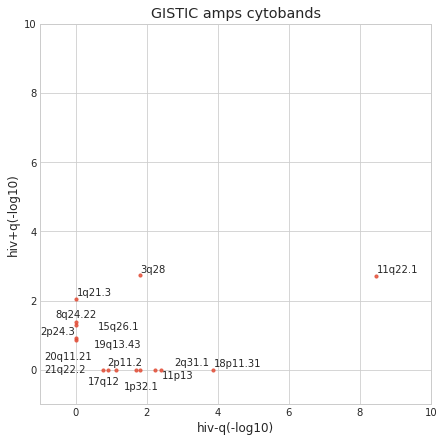

In [87]:
# Set theme
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(7, 7))
sns.regplot(y='hiv+q(-log10)', x='hiv-q(-log10)', data=ndf, ax=ax, fit_reg=False,  scatter_kws={"s": 10})#x_jitter=1e-12, y_jitter=1e-10,

ax.set_title('GISTIC amps cytobands')
ax.set_xlim(-1, 10)
ax.set_ylim(-1, 10)

texts = [plt.text(a, b, c) for a, b, c in zip(ndf['hiv-q(-log10)'], ndf['hiv+q(-log10)'], ndf.cytoband)]
adjust_text(texts)

of = f'{root}amp_cytoband_qvalue_comparison_hiv_pos_vs_neg.png'
plt.savefig(of, bbox_inches='tight', dpi=200)

In [88]:
ndf = pd.merge(pos_dels, neg_dels, left_on='cytoband', right_on='cytoband', how='outer')#.fillna(1)
ndf.head(2)

new_cols = pd.Series(ndf.columns.tolist()).str.replace('_x', '_hiv+').str.replace('_y', '_hiv-')

ndf.columns = new_cols
ndf = ndf.drop_duplicates(subset='cytoband', keep='last')

ndf.head(2)
ndf.shape
ndf['cytoband'].nunique()
ndf['q_value_hiv+'] = ndf['q_value_hiv+'].fillna(1)
ndf['q_value_hiv-'] = ndf['q_value_hiv-'].fillna(1)
ndf['hiv+q(-log10)'] = -np.log10(ndf['q_value_hiv+'])
ndf['hiv-q(-log10)'] = -np.log10(ndf['q_value_hiv-'])
# ndf['num_genes_hiv+'] = ndf['num_genes_hiv+'].fillna(0).astype(int)
# ndf['num_genes_hiv-'] = ndf['num_genes_hiv-'].fillna(0).astype(int)
# ndf['oncogenes_hiv+'] = ndf['oncogenes_hiv+'].fillna('None')
# ndf['oncogenes_hiv-'] = ndf['oncogenes_hiv-'].fillna('None')
ndf.head(2)

,q_value_x,cytoband,gene_x,q_value_y,gene_y
0,0.036117,1p13.2,NOTCH2,NaN,NaN
1,0.036117,1p13.2,LOC729987,NaN,NaN


,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-
360,0.036117,1p13.2,AKNAD1,NaN,NaN
848,0.141170,1p36.22,OR4F16,NaN,NaN


(36, 5)

36

,q_value_hiv+,cytoband,gene_hiv+,q_value_hiv-,gene_hiv-,hiv+q(-log10),hiv-q(-log10)
360,0.036117,1p13.2,AKNAD1,1.0,NaN,1.442288,-0.0
848,0.141170,1p36.22,OR4F16,1.0,NaN,0.850258,-0.0


Text(0.5, 1.0, 'GISTIC dels cytobands')

(-1, 16)

(-1, 16)

271

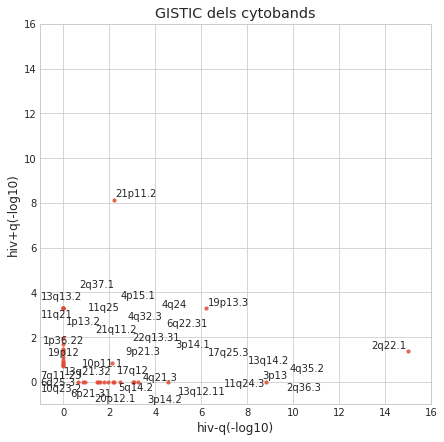

In [90]:
# Set theme
sns.set_style('whitegrid')
f, ax = plt.subplots(figsize=(7, 7))
sns.regplot(y='hiv+q(-log10)', x='hiv-q(-log10)', data=ndf, ax=ax, fit_reg=False,  scatter_kws={"s": 10})#x_jitter=1e-12, y_jitter=1e-10,

ax.set_title('GISTIC dels cytobands')
ax.set_xlim(-1, 16)
ax.set_ylim(-1, 16)

texts = [plt.text(a, b, c) for a, b, c in zip(ndf['hiv-q(-log10)'], ndf['hiv+q(-log10)'], ndf.cytoband)]
adjust_text(texts)

of = f'{root}del_cytoband_qvalue_comparison_hiv_pos_vs_neg.png'
plt.savefig(of, bbox_inches='tight', dpi=200)

# below are for genes

In [44]:
ndf = pd.merge(pos_amps, neg_amps, left_on='gene', right_on='gene', how='outer')#.fillna(1)
ndf.columns = ['hiv+q', 'cytoband_pos','gene', 'hiv-q', 'cytoband_neg']
ndf['cytoband'] = ndf.astype(str).apply(lambda x: map_two_columns(x1=x['cytoband_pos'], x2=x['cytoband_neg']), axis=1)

ndf = ndf.drop(['cytoband_pos', 'cytoband_neg'], axis=1)
ndf.head(2)

of = f'{root}amp_gene_qvalue_comparison_hiv_pos_vs_neg.txt'
ndf.to_csv(of, sep='\t', index=False)

,hiv+q,gene,hiv-q,cytoband
0,0.008915,NOTCH2,NaN,1q21.3
1,0.008915,CLK2,NaN,1q21.3


In [314]:
# for dels
pos_del_file = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/124_patient_adj_hiv_pos/del_genes.conf_99.txt.summary.sorted'
pos_dels = get_qvalue_cytoband(pos_del_file)
pos_dels.head(2)

neg_del_file = '//projects/trans_scratch/validations/workspace/szong/Cervical/cnv/124_patient_adj_hiv_neg/del_genes.conf_99.txt.summary.sorted'
neg_dels = get_qvalue_cytoband(neg_del_file)
neg_dels.head(2)

ndf = pd.merge(pos_dels, neg_dels, left_on='gene', right_on='gene', how='outer')#.fillna(1)
ndf.columns = ['hiv+q', 'cytoband_pos','gene', 'hiv-q', 'cytoband_neg']
ndf['cytoband'] = ndf.astype(str).apply(lambda x: map_two_columns(x1=x['cytoband_pos'], x2=x['cytoband_neg']), axis=1)

ndf = ndf.drop(['cytoband_pos', 'cytoband_neg'], axis=1)
ndf.head(2)

,q value,cytoband,gene
0,0.055942,1p36.21,MDS2
0,0.055942,1p36.21,PARK7


,q value,cytoband,gene
0,0.039246,1p13.2,GSTM1
0,0.039246,1p13.2,RAP1A


,hiv+q,gene,hiv-q,cytoband
0,0.055942,MDS2,NaN,1p36.21
1,0.055942,PARK7,NaN,1p36.21


In [92]:
ndf.shape
ndf['gene'].nunique()

(431, 3)

414

In [93]:
# look at duplicated on column gene
pd.concat(g for _, g in ndf.groupby("gene") if len(g) > 1).head(2)

,hiv+q,gene,hiv-q
20,1.795800e-19,ACSL3,1.0
21,1.855100e-18,ACSL3,1.0


In [315]:
ndf = ndf.drop_duplicates(subset='gene', keep='last')

In [283]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    k = 0
    j = 0 
    for i, point in a.iterrows():
        _ = ax.text(point['x']+j, point['y']+k, str(point['val']))
        k+=1
#         j+=.5
    return a

In [36]:
def plot_genes(ax, df):
    df = df.sort_values(['y', 'x'], ascending=True)
    for ix, row in df.iterrows():  
        gene = row.gene
        x = row['hiv+q']
        y = row['hiv-q']
        textx = row.x
        texty = row.y
#         anno_color = row.anno_color
#         anno_ecolor = row.anno_ecolor
#         arrow_color = row.arrow_color
#         fill_color = row.fill_color
        anno_color = 'blue'
        arrow_color = 'blue'
        ax.annotate('{}'.format(gene),
                    xy=(x,y), 
                    xytext=(textx, texty), fontsize=10,
                    ha='center', va='bottom', color=anno_color,
                    textcoords='data', xycoords="data", 
                    bbox=dict(boxstyle='round', 
#                               fc=fill_color, 
#                               edgecolor=anno_ecolor,
                              alpha=1, pad=.4),
                    arrowprops=dict(arrowstyle='-', 
                                    color=anno_color,
                                    shrinkB=0, 
                                    connectionstyle='arc3,rad=0.0' 
                                  ))

In [10]:
ndf = ndf.sort_values('hiv-q')

In [318]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/del_gene_qvalue_comparison_hiv_pos_vs_neg.txt'
ndf = pd.read_csv(of, sep='\t').fillna(1)
ndf.head(2)

,hiv+q,gene,hiv-q,cytoband
0,0.055942,MDS2,1.0,1p36.21
1,0.055942,PARK7,1.0,1p36.21


In [319]:
ndf['hiv+q(-log10)'] = -np.log10(ndf['hiv+q'])
ndf['hiv-q(-log10)'] = -np.log10(ndf['hiv-q'])

In [320]:
ndf.head()
ndf.shape

,hiv+q,gene,hiv-q,cytoband,hiv+q(-log10),hiv-q(-log10)
0,0.055942,MDS2,1.0,1p36.21,1.252262,-0.0
1,0.055942,PARK7,1.0,1p36.21,1.252262,-0.0
2,0.055942,RAP1GAP,1.0,1p36.21,1.252262,-0.0
3,0.055942,KIF1B,1.0,1p36.21,1.252262,-0.0
4,0.055942,SDHB,1.0,1p36.21,1.252262,-0.0


(414, 6)

Text(0.5,1,'GISTIC dels oncogenes')

(-1, 23)

(-1, 23)

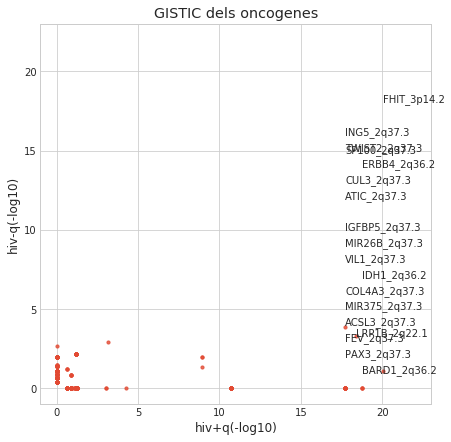

In [321]:
# Set theme
sns.set_style('whitegrid')


# Scatterplot arguments
# grid = sns.lmplot(x='hiv+q', y='hiv-q', data=ndf.fillna(.1),
#            fit_reg=False) # No regression line
#            #hue='Stage')   # Color by evolution stage
# # Tweak using Matplotlib
# # plt.ylim(0, .2)
# # plt.xlim(0, .2)
# grid.set(xscale="log", yscale="log")

f, ax = plt.subplots(figsize=(7, 7))


# ax.set(xscale="log", yscale="log")
sns.regplot(x='hiv+q(-log10)', y='hiv-q(-log10)', data=ndf, ax=ax, fit_reg=False, x_jitter=1e-12, y_jitter=1e-10, scatter_kws={"s": 10})




ax.set_title('GISTIC dels oncogenes')
ax.set_xlim(-1, 23)
ax.set_ylim(-1, 23)



    
ndf = ndf[(ndf['hiv+q(-log10)']>15)]#|(ndf['hiv-q(-log10)']>5)]
_ = label_point(ndf['hiv+q(-log10)'], ndf['hiv-q(-log10)'], ndf['gene']+'_'+ndf['cytoband'], plt.gca())  
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/del_gene_qvalue_comparison_hiv_pos_vs_neg.png'
plt.savefig(of, bbox_inches='tight', dpi=200)

In [126]:
plt.close()

In [18]:
ndf.head(2)

,hiv+q,gene,hiv-q
23,1.0,TP63,1.264200e-10
25,1.0,MYC,5.258800e-03


In [316]:
of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/del_gene_qvalue_comparison_hiv_pos_vs_neg.txt'
ndf.to_csv(of, sep='\t', index=False)

In [9]:
%%bash
cd /home/szong/bin/GISTIC_2_0_22/124_patient_adj_hiv_neg
cat del_genes.conf_99.txt.summary |awk -F ":" '{print $1"\t"$2}'|sed 's/chr//g'|sort -k4n> del_genes.conf_99.txt.summary.sorted
cat amp_genes.conf_99.txt.summary |awk -F ":" '{print $1"\t"$2}'|sed 's/chr//g'|sort -k4n> amp_genes.conf_99.txt.summary.sorted

# look at correlation between copy number and expression

In [49]:
df2

,q value,gene,new_gene
7,3.377000e-03,"NFE2L2,HOXD11,HOXD13",NFE2L2
7,3.377000e-03,"NFE2L2,HOXD11,HOXD13",HOXD11
7,3.377000e-03,"NFE2L2,HOXD11,HOXD13",HOXD13
9,8.332900e-13,DLG1,DLG1
16,5.524600e-02,RAC1,RAC1
20,6.399600e-05,ESRP1,ESRP1
22,8.899700e-02,UHRF2,UHRF2
26,1.518200e-01,"LMO2,EHF",LMO2
26,1.518200e-01,"LMO2,EHF",EHF
28,5.902500e-07,"YAP1,BIRC3",YAP1


In [ ]:
f = '/home/szong/bin/GISTIC_2_0_22/124_patient_adj_3k_0.1_1Mb/all_thresholded.by_genes.txt'
df = pd.read_csv(f, sep='\t')
df.head(2)

In [ ]:
f1 = '/projects/trans_scratch/validations/workspace/szong/Cervical/expression/NCI_ensembl69_stranded_RPKM_matrix.txt'
df1 = pd.read_csv(f1, sep='\t')
df1.head(2)

In [ ]:
genes = ['ECT2', 'YAP1', 'DLG1',  'DNAH5',  'SP100', 'STK11']

In [ ]:
def categorize_cnv(i):
#     for i in s:
    if i < 0:
        cat = 'cnv_loss'
    elif i > 0:
        cat = 'cnv_gain'
    else: cat = 'cnv_neutral'
#         ns.append(cat)
    return cat

In [ ]:
with plt.style.context("seaborn-whitegrid"):
    plt.rcParams["axes.edgecolor"] = "0.15"
    plt.rcParams["axes.linewidth"]  = 1.25
    fig = plt.figure(facecolor='w', figsize=(12,12))
    axes = (fig.subplots(int(len(genes)/3), 3)).ravel()
#     print(axes[1])
    for i, gene in enumerate(genes):
        dfgene = df[df['Gene Symbol'] == gene]
        df1gene = df1[df1.genes.str.contains('_{}$'.format(gene))]
        dff = pd.concat([dfgene, df1gene]).drop(['Cytoband', 'Gene Symbol', 'Locus ID', 'genes'], axis=1).T
        dff.columns = ['cnv', 'rpkm']
#         dff['groups'] = ['cnv_loss' if i< 0 'cnv_gain' elif i>0 else 'cnv_neutral' for i in dff.cnv ]
        dff['groups'] = dff.cnv.apply(categorize_cnv)
#         print(dff['groups'].unique())
        # boxplot overlaps individual data point

        ax = axes[i]
        _ = sns.boxplot('groups', 'rpkm', data=dff, ax=ax, order=['cnv_loss', 'cnv_neutral', 'cnv_gain'])
        _ = sns.swarmplot('groups', 'rpkm', data=dff, ax=ax, order=['cnv_loss', 'cnv_neutral', 'cnv_gain'])
        _ = ax.set_title(gene)
        _ = ax.set_xlabel('')
        grps = {}
        # overlay actuall data point
        categories = ['cnv_loss','cnv_neutral', 'cnv_gain']
        group_col = 'groups'
        value_col = 'rpkm'
        for i, cat in enumerate(categories):
#             print(i, cat)
            grps[i] = dff.query('{0} == "{1}"'.format(group_col, cat))[value_col]

        if len(categories) == 2:
            # statistical test for 1st grp
#             sts, p = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
            sts, p1 = ttest_ind(grps[0], grps[1])
#             print(p)
            p = round(p, 8)
            _ = ax.text(0.4 , 0.90,'p={}'.format(p), ha='center', va='center', transform=ax.transAxes, size=14)
        elif len(categories) == 3:
            # statistical test for 1st grp
#             sts, p1 = ss.mannwhitneyu(grps[0], grps[1], use_continuity=True, alternative=None)
            sts, p1 = ttest_ind(grps[0], grps[1])
#             print(p1)
            p1 = round(p1, 5)
            _ = ax.text(0.2 , 0.90,'p={}'.format(p1), ha='center', va='center', transform=ax.transAxes, size=14)
#             sts, p2 = ss.mannwhitneyu(grps[2], grps[1], use_continuity=True, alternative=None)
            sts, p2 = ttest_ind(grps[2], grps[1])
#             print(p2)
            p2 = round(p2, 5)
            _ = ax.text(0.7 , 0.90,'p={}'.format(p2), ha='center', va='center', transform=ax.transAxes, size=14)
    of = '/projects/trans_scratch/validations/workspace/szong/Cervical/cnv/cnv_expression.png'
    plt.savefig(of, dpi=200)